In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/ISRAEL_2000_2021 - fire_archive_M-C61_214285.csv
/kaggle/input/2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/TUNISIA_2000_2021_M-C61_214281.csv
/kaggle/input/2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/GREECE_2000_2021 - fire_archive_M-C61_214279.csv
/kaggle/input/2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/ITALY_2000_2021 - fire_archive_M-C61_214280.csv


In [3]:
import matplotlib.pyplot as plt


In [4]:
Tunisia_data=pd.read_csv('/kaggle/input/2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/TUNISIA_2000_2021_M-C61_214281.csv')
Greece_data = pd.read_csv('/kaggle/input/2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/GREECE_2000_2021 - fire_archive_M-C61_214279.csv')
Italy_data=pd.read_csv('/kaggle/input/2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/ITALY_2000_2021 - fire_archive_M-C61_214280.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<b>Each dataset is preprocessed separately<b>
    <br>   <g>1. <i> Tunisia</i> </g>
    
<i><small>Bright_ti4
(Brightness temperature I-4)
    VIIRS I-4: channel brightness temperature of the fire pixel measured in Kelvin.</small></i>

In [5]:
Tunisia_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,type
count,5642.000000,5642.000000,5642.000000,5642.000000,5642.000000,5642.000000,5642.000000,5642.000000,5642.000000,5642.000000
mean,35.828467,9.354333,329.213713,1.569326,1.199823,1221.526586,71.750798,304.428403,53.300675,0.198334
std,1.683498,0.639262,21.023300,0.771693,0.238360,550.570317,20.194725,10.468543,122.358703,0.613195
min,30.962700,7.914200,300.100000,1.000000,1.000000,27.000000,0.000000,271.000000,3.000000,0.000000
25%,35.421000,8.809000,313.800000,1.100000,1.000000,1018.000000,61.000000,296.032500,11.100000,0.000000
50%,36.450800,9.317800,327.500000,1.200000,1.100000,1215.000000,73.000000,306.200000,20.500000,0.000000
75%,36.804575,9.816750,337.200000,1.800000,1.300000,1303.000000,86.000000,312.500000,46.230000,0.000000
max,37.333900,11.391600,500.000000,4.800000,2.000000,2224.000000,100.000000,400.100000,2937.200000,3.000000


In [6]:
Tunisia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    5642 non-null   float64
 1   longitude   5642 non-null   float64
 2   brightness  5642 non-null   float64
 3   scan        5642 non-null   float64
 4   track       5642 non-null   float64
 5   acq_date    5642 non-null   object 
 6   acq_time    5642 non-null   int64  
 7   satellite   5642 non-null   object 
 8   instrument  5642 non-null   object 
 9   confidence  5642 non-null   int64  
 10  version     5642 non-null   object 
 11  bright_t31  5642 non-null   float64
 12  frp         5642 non-null   float64
 13  daynight    5642 non-null   object 
 14  type        5642 non-null   int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 661.3+ KB


In [7]:
Tunisia_data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

* We convert the acq_date and acq_time columns to date format.*
Since we are concerned by the aquisation time, we will delete the 

In [8]:
Tunisia_data['acq_date']=pd.to_datetime(Tunisia_data.acq_date)
Greece_data['acq_date']=pd.to_datetime(Greece_data.acq_date)
Italy_data['acq_date']=pd.to_datetime(Italy_data.acq_date)



In [9]:
Tunisia_data=Tunisia_data[['latitude', 'longitude','acq_date','bright_t31']]
Tunisia_data['month']=Tunisia_data.acq_date.dt.month
Tunisia_data['year']=Tunisia_data.acq_date.dt.year
Tunisia_data['day']=Tunisia_data.acq_date.dt.day


In [10]:
Greece_data = Greece_data[['latitude', 'longitude','brightness', 'acq_date','bright_t31']]
Greece_data['month']=Greece_data.acq_date.dt.month
Greece_data['year']=Greece_data.acq_date.dt.year
Greece_data['day']=Greece_data.acq_date.dt.day


In [11]:
Italy_data = Italy_data[['latitude', 'longitude','brightness', 'acq_date','bright_t31']]
Italy_data['month']=Italy_data.acq_date.dt.month
Italy_data['year']=Italy_data.acq_date.dt.year
Italy_data['day']=Italy_data.acq_date.dt.day


In [12]:
T_d = Tunisia_data.groupby(by=['month','day']).agg({'latitude':'count'})
G_d = Greece_data.groupby(by=['month','day']).agg({'latitude':'count'})
I_d = Italy_data.groupby(by=['month','day']).agg({'latitude':'count'})

Text(0, 0.5, 'number of the regions burned by a day.')

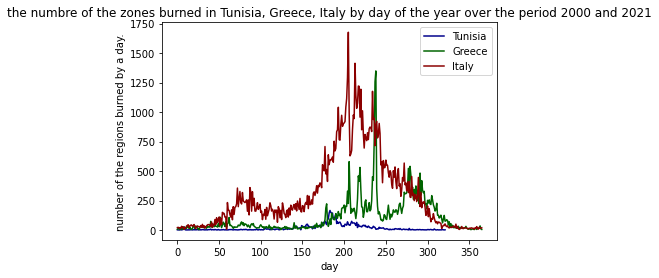

In [18]:
fig = plt.figure()
plt.plot(list(T_d.latitude),'-',color='darkblue')
plt.plot(list(G_d.latitude),'-',color='darkgreen')
plt.plot(list(I_d.latitude),'-',color='darkred')
plt.legend(['Tunisia','Greece','Italy'])
plt.title('the numbre of the zones burned in Tunisia, Greece, Italy by day of the year over the period 2000 and 2021',fontsize=12)
plt.xlabel('day',fontsize=10)
plt.ylabel('number of the regions burned by a day.',fontsize=10)
